# The Python toolbox

This module requires you to be familiar with the Python environment in order to solve biochemical engineering problems.
The tools needed to succesfully complete this module include: plotting, solving matrices, working with functions, and integrating functions in the Python environment. These tools will be used beyond CBI310 in your second semester and in your final year. Basic coding principles such as defining variables, writing for/while loops, and writing out mathematical formulas, are assumed to be knowledge aquired in MPR210. This tutorial aims to give you a short overview of the coding skills required throughout this module and gives you the opportunity to revise previously aqcuired coding knowledge.

### 1. Fundamentals
When a problem statement is given, the first thing you should do is to translate words to mathematics. This is achieved through the definition of parameters, variables, and functions. The following example is supposed to remind you of the correct syntax to use when defining a function.

Example:
What is the volume of a sphere?
- We know that the volume of a sphere is calculated by using: $V = 4/3*\pi*r^{3}$

In [29]:
import numpy as np #We need this library to use the functions in Python

def Volume_of_sphere (r):
    V = 4/3*np.pi*r**3
    return V

We can now use this function to calculate the volume of a sphere with any radius. Eg. r = 2, r = 4, and r = 10.

In [30]:
Volume_of_sphere(2), Volume_of_sphere(4), Volume_of_sphere(10)

(33.510321638291124, 268.082573106329, 4188.790204786391)

Rewriting this is inefficient coding. To make the code more efficient, we can use a for loop. This is illustrated below:

In [31]:
for i in [2,4,10]:
    print(Volume_of_sphere(i))

33.510321638291124
268.082573106329
4188.790204786391


Let's say we wanted to know the volume of spheres with radii from 1 to 10 with increments of 1. We can set up a list of these values in various ways. Below different methods are illustrated:

In [32]:
list_1 = np.arange(1,11,1) #Often used in for loops

list_2 = [1,2,3,4,5,6,7,8,9,10] #Not very efficient

list_3 = np.linspace(1,10,10) #Usually used to define timespans when doing integrations

list_1, list_2, list_3

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]))

In [33]:
for i in list_3:
    print(Volume_of_sphere(i))

4.1887902047863905
33.510321638291124
113.09733552923254
268.082573106329
523.5987755982989
904.7786842338603
1436.7550402417319
2144.660584850632
3053.6280592892786
4188.790204786391


Now we would like to plot this data. For this we must import another library:

In [34]:
import matplotlib.pyplot as plt

We should also write the data to a list, this could be done in several ways as shown below:

In [35]:
Volumes = [] #Create an empty list
for i in list_3:
    Volumes.append(Volume_of_sphere(i)) #The values are appended to the list
Volumes

[4.1887902047863905,
 33.510321638291124,
 113.09733552923254,
 268.082573106329,
 523.5987755982989,
 904.7786842338603,
 1436.7550402417319,
 2144.660584850632,
 3053.6280592892786,
 4188.790204786391]

In [36]:
Volumes2 = np.zeros(10) #The argument here represents the amount of values in the array = 'storage spaces'
Volumes2 # We can also create an array of zeros and replace these values with the values we want

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [37]:
for i in list_1: #Here we should use np.arange for the list since the indices can't be floats, they must be integers
    Volumes2[i-1] = Volume_of_sphere(i) #Remember that the first index is 0, not 1.
Volumes2

array([4.18879020e+00, 3.35103216e+01, 1.13097336e+02, 2.68082573e+02,
       5.23598776e+02, 9.04778684e+02, 1.43675504e+03, 2.14466058e+03,
       3.05362806e+03, 4.18879020e+03])

The list method is usually easier than the method that uses arrays. It is less prone to mistakes regarding indices.
Now that the data is stored somewhere, it can be plotted.

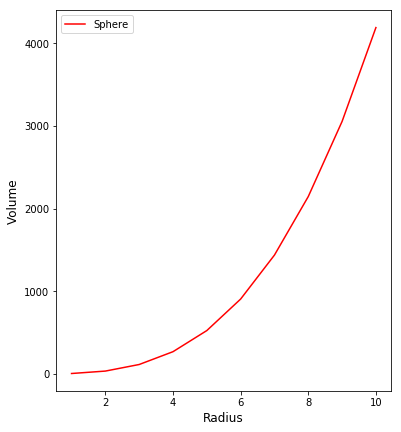

In [38]:
plt.figure(1,[6,7]) #First argument represents figure number, the second argument sizes the plot
plt.plot(list_3,Volumes, label = 'Sphere', color = 'r')
plt.xlabel('Radius', fontsize = 12)
plt.ylabel('Volume', fontsize = 12)
plt.legend(loc='best') #Legend automatically goes to the optimal location
plt.show()

Let look at another function now:
$$Money = 3Time^3 - 50^2 + 500Time + 25000 $$

In [39]:
Time = np.linspace(0,50,101)

Firstly when using linspace it is often beneficial to divide your time using a large number of increments plus one, it results in:

In [40]:
Time

array([ 0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ,
        5.5,  6. ,  6.5,  7. ,  7.5,  8. ,  8.5,  9. ,  9.5, 10. , 10.5,
       11. , 11.5, 12. , 12.5, 13. , 13.5, 14. , 14.5, 15. , 15.5, 16. ,
       16.5, 17. , 17.5, 18. , 18.5, 19. , 19.5, 20. , 20.5, 21. , 21.5,
       22. , 22.5, 23. , 23.5, 24. , 24.5, 25. , 25.5, 26. , 26.5, 27. ,
       27.5, 28. , 28.5, 29. , 29.5, 30. , 30.5, 31. , 31.5, 32. , 32.5,
       33. , 33.5, 34. , 34.5, 35. , 35.5, 36. , 36.5, 37. , 37.5, 38. ,
       38.5, 39. , 39.5, 40. , 40.5, 41. , 41.5, 42. , 42.5, 43. , 43.5,
       44. , 44.5, 45. , 45.5, 46. , 46.5, 47. , 47.5, 48. , 48.5, 49. ,
       49.5, 50. ])

Instead of:

In [41]:
X = np.linspace(0,50,100)
X

array([ 0.        ,  0.50505051,  1.01010101,  1.51515152,  2.02020202,
        2.52525253,  3.03030303,  3.53535354,  4.04040404,  4.54545455,
        5.05050505,  5.55555556,  6.06060606,  6.56565657,  7.07070707,
        7.57575758,  8.08080808,  8.58585859,  9.09090909,  9.5959596 ,
       10.1010101 , 10.60606061, 11.11111111, 11.61616162, 12.12121212,
       12.62626263, 13.13131313, 13.63636364, 14.14141414, 14.64646465,
       15.15151515, 15.65656566, 16.16161616, 16.66666667, 17.17171717,
       17.67676768, 18.18181818, 18.68686869, 19.19191919, 19.6969697 ,
       20.2020202 , 20.70707071, 21.21212121, 21.71717172, 22.22222222,
       22.72727273, 23.23232323, 23.73737374, 24.24242424, 24.74747475,
       25.25252525, 25.75757576, 26.26262626, 26.76767677, 27.27272727,
       27.77777778, 28.28282828, 28.78787879, 29.29292929, 29.7979798 ,
       30.3030303 , 30.80808081, 31.31313131, 31.81818182, 32.32323232,
       32.82828283, 33.33333333, 33.83838384, 34.34343434, 34.84

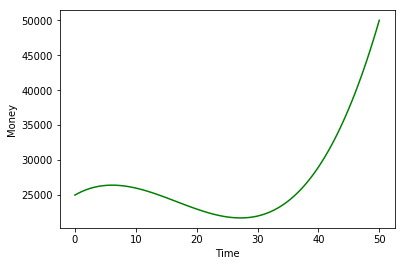

In [42]:
Money = Time**3 - 50*Time**2 + 500*Time + 25000

plt.plot(Time, Money, 'g')
plt.xlabel('Time')
plt.ylabel('Money')
plt.show()

Now to find points on the plot that you require. If you want to find the time when you have the lowest money use np.argmin(). It returns the index of the minimum.

In [43]:
Time[np.argmin(Money)]

27.0

The maximum can be found with np.argmax():

In [44]:
Money[np.argmax(Money)]

50000.0

If you wanted to find the Time for a specific value on a graph, for example the Money must be within 1 of 30000 but it is often necessary to use a large number of indices.

In [45]:
Time = np.linspace(0,50,10001)
Money = Time**3 - 50*Time**2 + 500*Time + 25000
Time[np.where(abs(Money - 30000) < 1)[0][0]]

40.74

np.where() finds an index that satisfied the condition that you give it. The [0][0] is simple to get rid of unnecessary brackets.

## 2. Matrix math

Another very important tool on Python is matrix math. When faced with a lot of equations that need to be solved simulatneously, a matrix is a fast and easy method to find the solution. To use matrices in Python, we only need the numpy library.

Let's say we have the following equations:

- x+2y-z = 1
- 7x - y = 2
- 2x + 2y -z = 0

We can write a coefficient matrix (A) based on this:

In [46]:
                #x  y  z
A = np.matrix ([[1, 2,-1],  #Equation 1
                [7,-1, 0],  #Equation 2
                [2, 2,-1]]) #Equation 3

A

matrix([[ 1,  2, -1],
        [ 7, -1,  0],
        [ 2,  2, -1]])

To solve the matrix we need to do some matrix math: $A*x = b$ then $A*b^{-1} = x$. This means we need to transpose our matrix b,
we transpose the matrix to get it in the right format. Otherwise, the matrices won't allow you to solve for x,y, and z.

In [47]:
b = np.matrix([[1,2,0]]).T
b

matrix([[1],
        [2],
        [0]])

In [48]:
x = np.linalg.solve(A,b)
x

matrix([[ -1.],
        [ -9.],
        [-20.]])

## 3. Integrating functions

In CBI310, you'll often have to integrate functions in order to see product profiles over time. To integrate functions, Python has a function in a library called 'scipy'. The function is called 'odeint' and it is imported as shown below:

In [49]:
from scipy.integrate import odeint

Odeint takes three arguments:
1. The fuction to be integrated
2. The initial values of the variables
3. The span over which the integration occurs

Lets say we have a function for how your Money changes overtime:

$$\frac{dMoney}{dt} =  3t^3 - 50t^2 + 9t + 0.001(Money)$$

In [50]:
#We can now define a function with will give us the change in money

def equation(Money, t):
    dmoney =  3*t**3 - 50*t**2 + 9*t + 0.001*(Money)
    return dmoney

Now that we have a function we can specify a starting amount and a certain amount of time that we would like to evaluate the function over:

In [51]:
tspan = np.linspace(0,25,1001) #y --> We look at 25 years 
M0 = 25000 #Initial amount

In [52]:
Money = odeint(equation,M0,tspan)

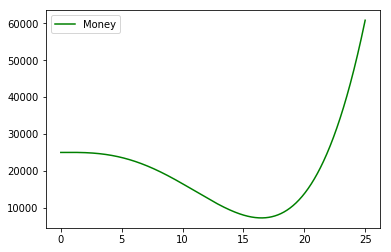

In [53]:
plt.plot(tspan,Money, 'g',label = 'Money')
# plt.plot(tspan,Cb, label ='Cb')
plt.legend(loc='best')
plt.show()

This plot now gives us the money over time if it changes with the function given. But what happened here?

Initially we started with Money = 25000 lets call this $t_0$. Then we wanted to work our how much money we would have at $t_1$.

In [54]:
Money0 = 25000 
t0 = 0
t1 = 0.5

Now lets input it into the equation and calculate the change in money between $t_0$ and $t_1$:

In [55]:
dmoney_dt =  3*t1**3 - 50*t1**2 + 9*t1 + 0.001*(Money0)

Now to calculate the amount of money at $t_1$. We have to add the change to the original amount and multiple the above equation by $dt$

In [56]:
Money1 = Money0 + dmoney_dt*(t1 - t0)
Money1

25008.6875

This is what odeint does and is then repeated for each 1001 indices to generate the plot. The more indices the more accurate the plot will be.

 Odeint will be used widely in the rest of CBI310 so spend some time to understand how it works.